# 03 - Sampling Methods Overview

Different ways to collect samples from a population:

- **Simple Random:** Everyone has equal chance (like drawing names from a hat)
- **Stratified:** Divide into subgroups (age, gender) and sample from each
- **Cluster:** Sample whole groups (schools, companies) instead of individuals
- **Systematic:** Pick every nth person (every 10th customer)

**Key Idea:** Each method has trade-offs between fairness, cost, and representation.

## Classroom Example: Sampling 100 Students

Imagine we have 100 students with IDs 1-100. Let's demonstrate each sampling method.

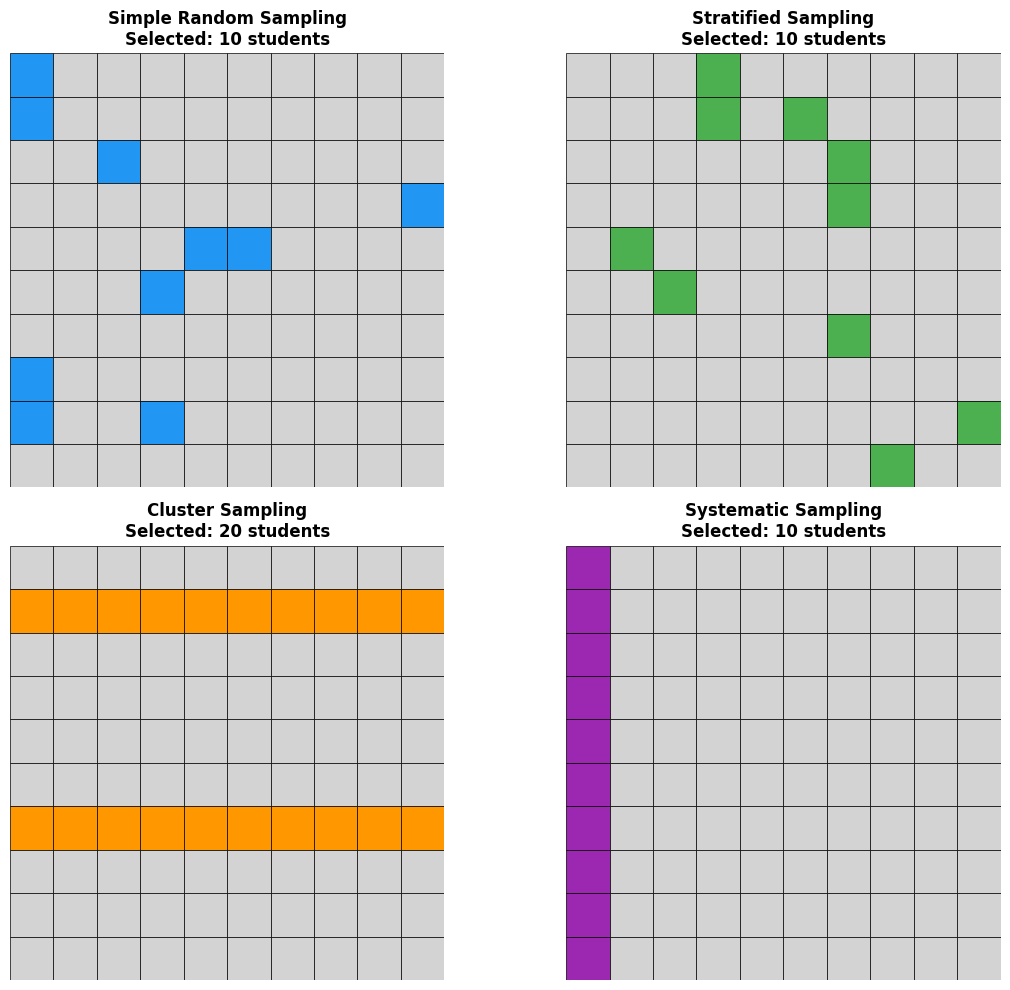


Simple Random Sample: [np.int64(1), np.int64(11), np.int64(23), np.int64(40), np.int64(45), np.int64(46), np.int64(54), np.int64(71), np.int64(81), np.int64(84)]
Stratified Sample: [np.int64(4), np.int64(14), np.int64(16), np.int64(27), np.int64(37), np.int64(42), np.int64(53), np.int64(67), np.int64(90), np.int64(98)] (balanced across grades)
Cluster Sample: [np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70)] (entire rows 2 and 7)
Systematic Sample: [np.int64(1), np.int64(11), np.int64(21), np.int64(31), np.int64(41), np.int64(51), np.int64(61), np.int64(71), np.int64(81), np.int64(91)] (every 10th student)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Population: 100 students
population = np.arange(1, 101)

# Method 1: Simple Random - pick any 10
simple_random = np.random.choice(population, size=10, replace=False)

# Method 2: Stratified - divide into 4 grades, pick 2-3 from each
# Freshmen (1-25), Sophomores (26-50), Juniors (51-75), Seniors (76-100)
freshmen = np.random.choice(np.arange(1, 26), size=3, replace=False)
sophomores = np.random.choice(np.arange(26, 51), size=3, replace=False)
juniors = np.random.choice(np.arange(51, 76), size=2, replace=False)
seniors = np.random.choice(np.arange(76, 101), size=2, replace=False)
stratified = np.concatenate([freshmen, sophomores, juniors, seniors])

# Method 3: Cluster - pick 2 entire rows (10 students per row)
# Row 1: students 1-10, Row 2: 11-20, etc.
cluster_rows = [2, 7]  # Pick rows 2 and 7
cluster = np.concatenate([np.arange((r-1)*10 + 1, r*10 + 1) for r in cluster_rows])

# Method 4: Systematic - every 10th student
systematic = population[::10]  # Students 1, 11, 21, 31, ...

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

methods = [
    ('Simple Random', simple_random, '#2196F3'),
    ('Stratified', stratified, '#4CAF50'),
    ('Cluster', cluster, '#FF9800'),
    ('Systematic', systematic, '#9C27B0')
]

for idx, (name, sample, color) in enumerate(methods):
    ax = axes[idx // 2, idx % 2]
    
    # Show all students as gray, selected as colored
    colors = ['lightgray'] * 100
    for s in sample:
        colors[s - 1] = color
    
    # Create grid visualization
    grid = np.arange(1, 101).reshape(10, 10)
    color_grid = np.array(colors).reshape(10, 10)
    
    for i in range(10):
        for j in range(10):
            ax.add_patch(plt.Rectangle((j, 9-i), 1, 1, 
                                      facecolor=color_grid[i, j], 
                                      edgecolor='black', linewidth=0.5))
    
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_aspect('equal')
    ax.set_title(f'{name} Sampling\nSelected: {len(sample)} students', fontsize=12, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("\nSimple Random Sample:", sorted(simple_random))
print("Stratified Sample:", sorted(stratified), "(balanced across grades)")
print("Cluster Sample:", sorted(cluster), "(entire rows 2 and 7)")
print("Systematic Sample:", sorted(systematic), "(every 10th student)")

## Real-World Example: Netflix Testing a New Feature

Netflix wants to test a new recommendation algorithm. Which sampling method should they use?

**Challenge:** Need representation across countries, devices, and age groups.

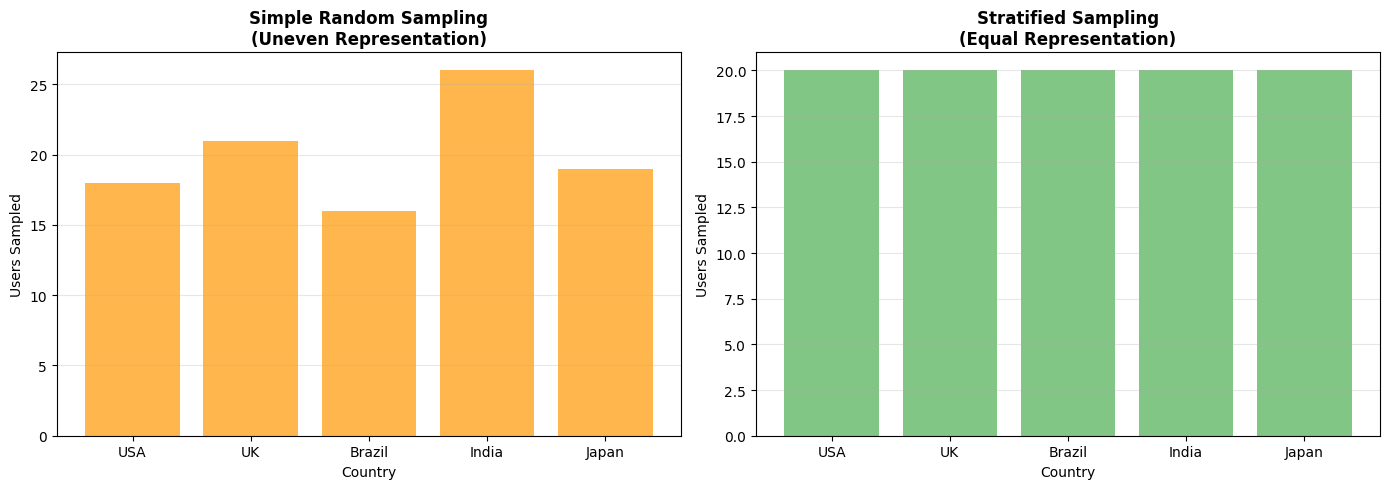


✅ STRATIFIED sampling ensures:
   - All countries represented equally
   - All device types included
   - Better for testing features across diverse user groups

⚠️ SIMPLE RANDOM might:
   - Over-sample some countries, under-sample others
   - Miss rare but important user segments


In [2]:
# Simulate Netflix user base
countries = ['USA', 'UK', 'Brazil', 'India', 'Japan']
devices = ['iPhone', 'Android', 'Smart TV', 'Desktop']

# Create stratified sample ensuring all groups represented
np.random.seed(42)

# Method 1: Simple Random (might miss some groups)
total_users = 1000
random_countries = np.random.choice(countries, size=100)
random_devices = np.random.choice(devices, size=100)

# Method 2: Stratified (guarantees representation)
stratified_sample = []
for country in countries:
    for device in devices:
        stratified_sample.extend([f"{country}-{device}"] * 5)  # 5 users per combo

# Compare coverage
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Simple Random coverage by country
random_country_counts = {c: np.sum(random_countries == c) for c in countries}
ax1.bar(random_country_counts.keys(), random_country_counts.values(), color='#FF9800', alpha=0.7)
ax1.set_title('Simple Random Sampling\n(Uneven Representation)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Users Sampled')
ax1.set_xlabel('Country')
ax1.grid(axis='y', alpha=0.3)

# Stratified coverage by country
stratified_country_counts = {c: 20 for c in countries}  # 20 per country (5 devices × 4)
ax2.bar(stratified_country_counts.keys(), stratified_country_counts.values(), color='#4CAF50', alpha=0.7)
ax2.set_title('Stratified Sampling\n(Equal Representation)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Users Sampled')
ax2.set_xlabel('Country')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ STRATIFIED sampling ensures:")
print("   - All countries represented equally")
print("   - All device types included")
print("   - Better for testing features across diverse user groups")

print("\n⚠️ SIMPLE RANDOM might:")
print("   - Over-sample some countries, under-sample others")
print("   - Miss rare but important user segments")

## Summary

| Method | Best For | Trade-off |
|--------|----------|----------|
| **Simple Random** | Fair, unbiased selection | May miss rare groups |
| **Stratified** | Guaranteeing subgroup representation | Requires knowing subgroups |
| **Cluster** | Cost efficiency (geographic areas) | Less precise than random |
| **Systematic** | Easy implementation | Hidden patterns can bias results |

**Netflix chose stratified sampling** to ensure their new feature works across all countries and device types!